# This Model tells about simple implementation of detection of depression

The features tells about the candiate history for being charged towards mental depression due to facets of unemployments.
Our main objective is to find the best factors which are responsible for Depression and detect the level of Depression.
Cateogrical values will help to classify the level of depression into different levels of age in employees in an Ogranization.

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r'E:/R_Datasets/R_projects_ML_cape_fear/unemplyment_mental_health/Mental_health_analysis_employee\Cleaned_Data.csv')

In [98]:
df.head()

,I am currently employed at least part-time,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,...,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
0,0,0,High School or GED,0,0,0.0,0,1,0,1,...,1.0,0.0,1.0,0.0,0.0,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
1,1,1,Some Phd,1,0,0.0,0,1,0,0,...,0.0,0.0,1.0,0.0,1.0,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
2,1,0,Completed Undergraduate,1,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
3,0,0,Some Undergraduate,1,0,NaN,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop
4,1,1,Completed Undergraduate,1,1,35.0,1,1,0,1,...,1.0,1.0,1.0,1.0,1.0,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet


In [4]:
df.describe()

,I am currently employed at least part-time,I identify as having a mental illness,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total length of any gaps in my resume in months.,...,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness
count,334.000000,334.000000,334.000000,334.000000,297.000000,334.000000,334.000000,334.000000,334.000000,334.000000,...,334.000000,334.000000,333.000000,334.000000,334.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,0.679641,0.239521,0.874251,0.077844,3.276094,0.098802,0.964072,0.110778,0.245509,8.497006,...,0.020958,1.194611,0.153153,0.299401,0.257485,0.126126,0.114114,0.147147,0.087087,0.300300
std,0.467315,0.427431,0.332063,0.268328,14.126045,0.298844,0.186390,0.314328,0.431034,20.722643,...,0.143459,8.115227,0.360677,0.458683,0.437905,0.332491,0.318428,0.354786,0.282387,0.459078
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.750000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,100.000000,...,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 31 columns):
I am currently employed at least part-time                      334 non-null int64
I identify as having a mental illness                           334 non-null int64
Education                                                       334 non-null object
I have my own computer separate from a smart phone              334 non-null int64
I have been hospitalized before for my mental illness           334 non-null int64
How many days were you hospitalized for your mental illness     297 non-null float64
I am legally disabled                                           334 non-null int64
I have my regular access to the internet                        334 non-null int64
I live with my parents                                          334 non-null int64
I have a gap in my resume                                       334 non-null int64
Total length of any gaps in my resume in months.              

In [6]:
df.corr()

,I am currently employed at least part-time,I identify as having a mental illness,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total length of any gaps in my resume in months.,...,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness
I am currently employed at least part-time,1.000000,-0.065718,0.126657,-0.159753,-0.134509,-0.310250,0.143274,-0.166550,-0.145068,-0.241202,...,-0.123518,-0.042900,-0.046651,-0.125585,-0.094638,-0.106622,-0.117100,-0.168008,-0.038354,-0.040233
I identify as having a mental illness,-0.065718,1.000000,-0.125679,0.439156,0.291421,0.237348,-0.080127,0.137187,0.250350,0.219437,...,0.015836,0.126772,0.370499,0.567467,0.712368,0.426044,0.443726,0.445889,0.403595,0.281464
I have my own computer separate from a smart phone,0.126657,-0.125679,1.000000,-0.125730,-0.151312,-0.116516,0.217900,-0.125075,-0.182295,-0.167198,...,-0.007550,-0.016522,-0.039372,-0.205544,-0.107092,-0.128130,-0.176590,-0.097535,-0.075143,-0.007644
I have been hospitalized before for my mental illness,-0.159753,0.439156,-0.125730,1.000000,0.540973,0.315741,-0.063998,0.075473,0.223729,0.182043,...,0.113515,0.359856,0.155959,0.249252,0.340045,0.361444,0.247587,0.321463,0.267385,0.151201
How many days were you hospitalized for your mental illness,-0.134509,0.291421,-0.151312,0.540973,1.000000,0.246325,-0.044202,0.145937,0.179582,0.112779,...,0.049401,0.662266,-0.026030,0.182759,0.229210,0.213138,0.147707,0.271200,0.183054,0.001428
I am legally disabled,-0.310250,0.237348,-0.116516,0.315741,0.246325,1.000000,0.010008,0.138883,0.137505,0.196681,...,0.091647,0.073773,0.172561,0.112163,0.241015,0.183042,0.171397,0.152192,0.152252,0.097591
I have my regular access to the internet,0.143274,-0.080127,0.217900,-0.063998,-0.044202,0.010008,1.000000,-0.034376,-0.039393,-0.094103,...,0.028245,-0.037055,-0.007255,-0.049428,0.003305,-0.023610,-0.133309,0.034829,0.002574,0.056366
I live with my parents,-0.166550,0.137187,-0.125075,0.075473,0.145937,0.138883,-0.034376,1.000000,0.175459,0.044540,...,0.014954,0.116312,0.114977,0.165007,0.163039,0.153506,0.233749,0.122880,0.195804,-0.002316
I have a gap in my resume,-0.145068,0.250350,-0.182295,0.223729,0.179582,0.137505,-0.039393,0.175459,1.000000,0.648278,...,0.013668,0.065282,0.163383,0.204279,0.252746,0.244760,0.167549,0.293844,0.243720,0.096946
Total length of any gaps in my resume in months.,-0.241202,0.219437,-0.167198,0.182043,0.112779,0.196681,-0.094103,0.044540,0.648278,1.000000,...,0.140936,0.031048,0.161942,0.210823,0.169188,0.144542,0.148231,0.250986,0.266728,0.095734


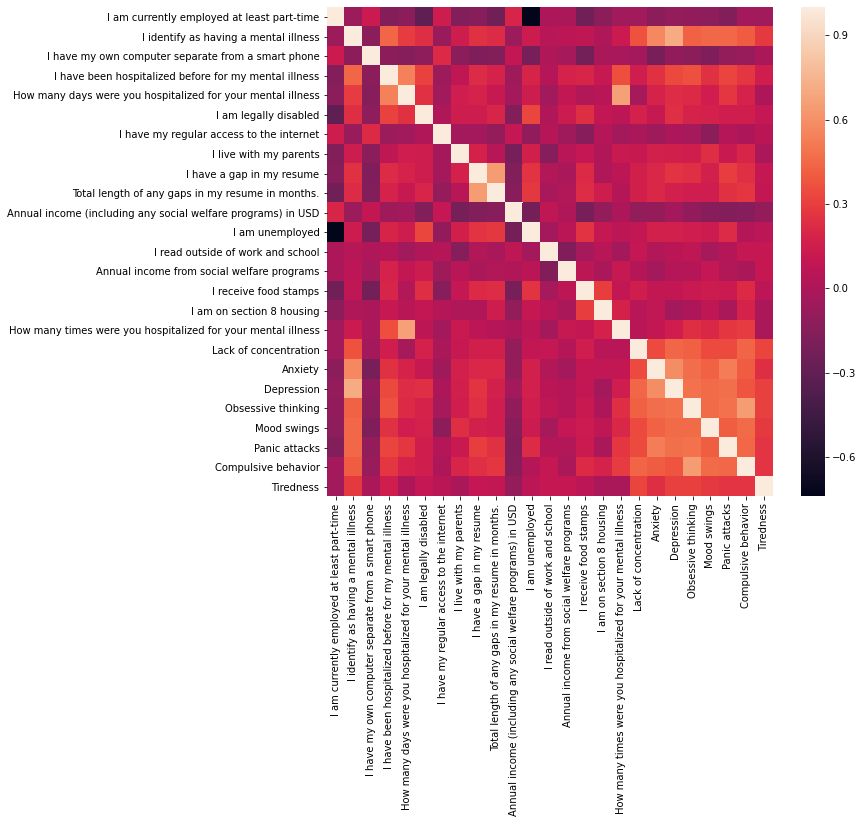

In [7]:
plt.figure(figsize=(10,9))
sns.heatmap(df.corr())
plt.show()

In [8]:
df.columns

Index(['I am currently employed at least part-time',
       'I identify as having a mental illness', 'Education',
       'I have my own computer separate from a smart phone',
       'I have been hospitalized before for my mental illness',
       'How many days were you hospitalized for your mental illness',
       'I am legally disabled', 'I have my regular access to the internet',
       'I live with my parents', 'I have a gap in my resume',
       'Total length of any gaps in my resume in months.',
       'Annual income (including any social welfare programs) in USD',
       'I am unemployed', 'I read outside of work and school',
       'Annual income from social welfare programs', 'I receive food stamps',
       'I am on section 8 housing',
       'How many times were you hospitalized for your mental illness',
       'Lack of concentration', 'Anxiety', 'Depression', 'Obsessive thinking',
       'Mood swings', 'Panic attacks', 'Compulsive behavior', 'Tiredness',
       'Age', 'Gender

In [9]:
df = df.dropna()

In [10]:
df.head()

,I am currently employed at least part-time,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,...,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
0,0,0,High School or GED,0,0,0.0,0,1,0,1,...,1.0,0.0,1.0,0.0,0.0,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
1,1,1,Some Phd,1,0,0.0,0,1,0,0,...,0.0,0.0,1.0,0.0,1.0,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
2,1,0,Completed Undergraduate,1,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
4,1,1,Completed Undergraduate,1,1,35.0,1,1,0,1,...,1.0,1.0,1.0,1.0,1.0,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet
5,1,0,High School or GED,1,0,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$0-$9,999",South Atlantic,Android Phone / Tablet


In [11]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df['Education'] = lb_make.fit_transform(df['Education'])


In [27]:
X = df[['Anxiety','Education','Tiredness',
        'Lack of concentration','Panic attacks',
        'Mood swings','I identify as having a mental illness','I have been hospitalized before for my mental illness']]
Y = df[['Depression']]

In [28]:
from sklearn.feature_selection import SelectKBest, chi2
X_new = SelectKBest(chi2, k=5).fit_transform(X, Y)

In [29]:
X_new.shape

(294, 5)

In [30]:
Y = Y.values

In [31]:
print(Y.shape)

(294, 1)


Accuracy: 0.8444444444444444
[[30  2]
 [ 5  8]]


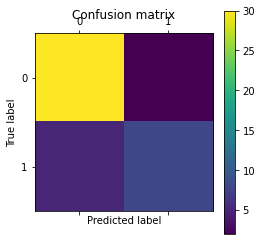

In [32]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

## split of Test and train Data 

X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.15, random_state=1)

### model Building 

clf = DecisionTreeClassifier(max_depth=None, max_leaf_nodes=20)
from sklearn import tree

clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)
print(cm)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [33]:
print(metrics.classification_report(y_pred,y_test))


             precision    recall  f1-score   support

          0       0.86      0.94      0.90        32
          1       0.80      0.62      0.70        13

avg / total       0.84      0.84      0.84        45



In [48]:
### improving Accuracy using K fold Corss Validation #### 

from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

print('Accuracy for K folds: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

### Repeated K fold 

cv2 = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores2 = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=cv2, n_jobs=-1)

print('Accuracy for repeated K folds: %.3f (%.3f)' % (np.mean(scores2), np.std(scores2)))




Accuracy for K folds: 0.908 (0.044)
Accuracy for repeated K folds: 0.906 (0.044)


In [50]:
df.columns

Index(['I am currently employed at least part-time',
       'I identify as having a mental illness', 'Education',
       'I have my own computer separate from a smart phone',
       'I have been hospitalized before for my mental illness',
       'How many days were you hospitalized for your mental illness',
       'I am legally disabled', 'I have my regular access to the internet',
       'I live with my parents', 'I have a gap in my resume',
       'Total length of any gaps in my resume in months.',
       'Annual income (including any social welfare programs) in USD',
       'I am unemployed', 'I read outside of work and school',
       'Annual income from social welfare programs', 'I receive food stamps',
       'I am on section 8 housing',
       'How many times were you hospitalized for your mental illness',
       'Lack of concentration', 'Anxiety', 'Depression', 'Obsessive thinking',
       'Mood swings', 'Panic attacks', 'Compulsive behavior', 'Tiredness',
       'Age', 'Gender

In [49]:
#### Model Evaluation in a more structured manner 

In [53]:
mental_health = df['Lack of concentration'] + df['Anxiety'] + df['Depression'] + df['Obsessive thinking'] + df['Mood swings'] + df['Panic attacks'] + df['Compulsive behavior'] + df['Tiredness']

In [55]:
mental_health = pd.DataFrame(mental_health)

In [56]:
mental_health.head()

,0
0,5.0
1,5.0
2,0.0
4,8.0
5,0.0


In [57]:
mental_health.describe()

,0
count,294.000000
mean,1.476190
std,2.033284
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,8.000000


In [58]:
df['mental_health'] = mental_health

In [62]:
df_new = df.drop(['Lack of concentration','Anxiety','Depression','Obsessive thinking','Mood swings','Panic attacks','Compulsive behavior','Tiredness'],axis=1)

In [63]:
df_new.head()

,I am currently employed at least part-time,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,...,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,Age,Gender,Household Income,Region,Device Type,mental_health
0,0,0,3,0,0,0.0,0,1,0,1,...,0,0,0,0,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet,5.0
1,1,1,4,1,0,0.0,0,1,0,0,...,0,0,0,0,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop,5.0
2,1,0,2,1,0,0.0,0,1,0,0,...,0,0,0,0,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop,0.0
4,1,1,2,1,1,35.0,1,1,0,1,...,30,0,0,4,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet,8.0
5,1,0,3,1,0,0.0,0,1,1,0,...,0,0,0,0,30-44,Male,"$0-$9,999",South Atlantic,Android Phone / Tablet,0.0


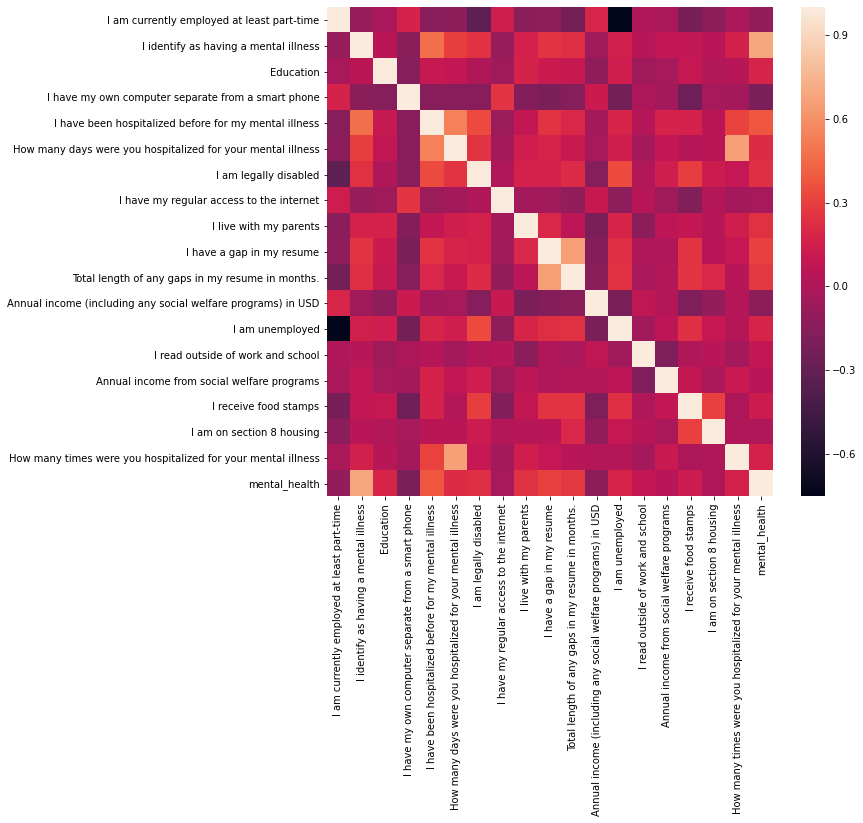

In [64]:
plt.figure(figsize=(10,9))
sns.heatmap(df_new.corr())
plt.show()

In [65]:
df.columns

Index(['I am currently employed at least part-time',
       'I identify as having a mental illness', 'Education',
       'I have my own computer separate from a smart phone',
       'I have been hospitalized before for my mental illness',
       'How many days were you hospitalized for your mental illness',
       'I am legally disabled', 'I have my regular access to the internet',
       'I live with my parents', 'I have a gap in my resume',
       'Total length of any gaps in my resume in months.',
       'Annual income (including any social welfare programs) in USD',
       'I am unemployed', 'I read outside of work and school',
       'Annual income from social welfare programs', 'I receive food stamps',
       'I am on section 8 housing',
       'How many times were you hospitalized for your mental illness',
       'Lack of concentration', 'Anxiety', 'Depression', 'Obsessive thinking',
       'Mood swings', 'Panic attacks', 'Compulsive behavior', 'Tiredness',
       'Age', 'Gender

Accuracy: 0.8888888888888888
[[32  2]
 [ 3  8]]


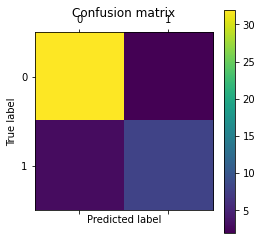

             precision    recall  f1-score   support

          0       0.91      0.94      0.93        34
          1       0.80      0.73      0.76        11

avg / total       0.89      0.89      0.89        45



In [74]:
X = df_new[['I identify as having a mental illness','Education',
           'I have been hospitalized before for my mental illness','I am unemployed','I have a gap in my resume']]

y = df_new[['mental_health']]

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

## split of Test and train Data 

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

### model Building 

clf = DecisionTreeClassifier(max_depth=None, max_leaf_nodes=20)
from sklearn import tree

clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)
print(cm)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(metrics.classification_report(y_pred,y_test))

## The number of truly classified classes are comparetivly high than the previous ones.
### we dont have to apply boosting here

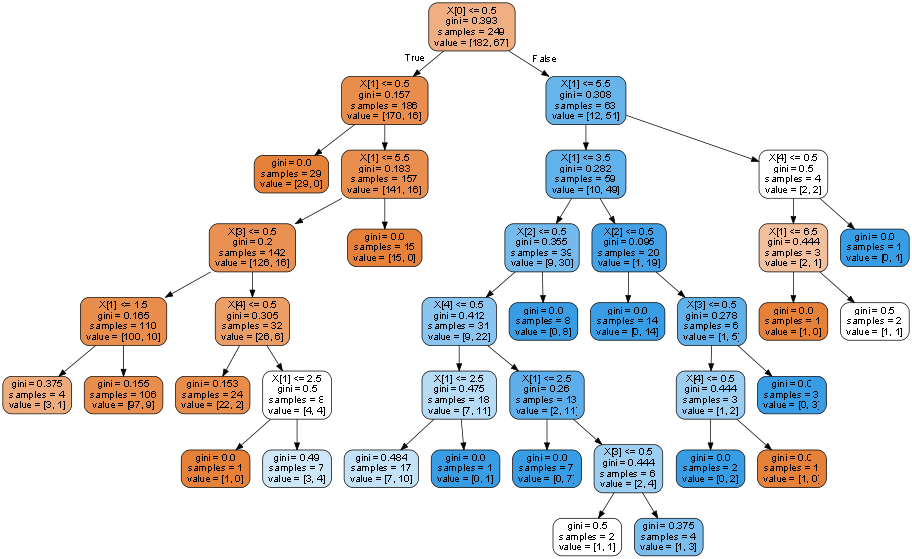

In [76]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image
import pydotplus
dot_data = StringIO()

from IPython.display import Image 
export_graphviz(clf,out_file=dot_data,filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

graph.set_size('"9.5,9.5!"')
Image(graph.create_png())

In [77]:
df.columns

Index(['I am currently employed at least part-time',
       'I identify as having a mental illness', 'Education',
       'I have my own computer separate from a smart phone',
       'I have been hospitalized before for my mental illness',
       'How many days were you hospitalized for your mental illness',
       'I am legally disabled', 'I have my regular access to the internet',
       'I live with my parents', 'I have a gap in my resume',
       'Total length of any gaps in my resume in months.',
       'Annual income (including any social welfare programs) in USD',
       'I am unemployed', 'I read outside of work and school',
       'Annual income from social welfare programs', 'I receive food stamps',
       'I am on section 8 housing',
       'How many times were you hospitalized for your mental illness',
       'Lack of concentration', 'Anxiety', 'Depression', 'Obsessive thinking',
       'Mood swings', 'Panic attacks', 'Compulsive behavior', 'Tiredness',
       'Age', 'Gender

In [82]:
#### Applied Different model with improvement #### 


## linkage between unemployment and Education level


X = df_new['Education']
y = df_new['I am unemployed']


C:\Users\Ted\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


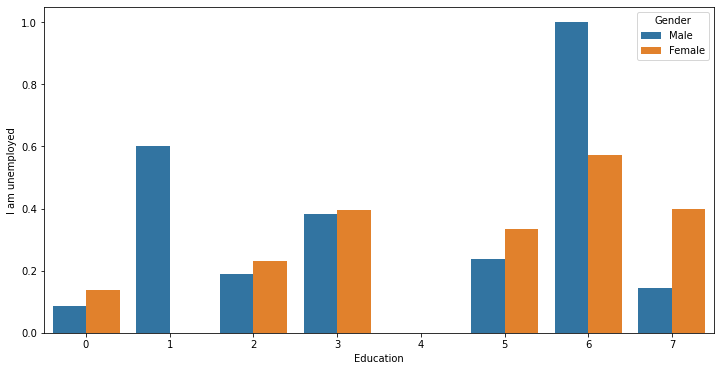

In [99]:

plt.figure(figsize=(12,6))
sns.barplot(x = X,
            y = y,
            hue = 'Gender',
            data = df,
            ci = 0.05)
 
# Show the plot
plt.show()

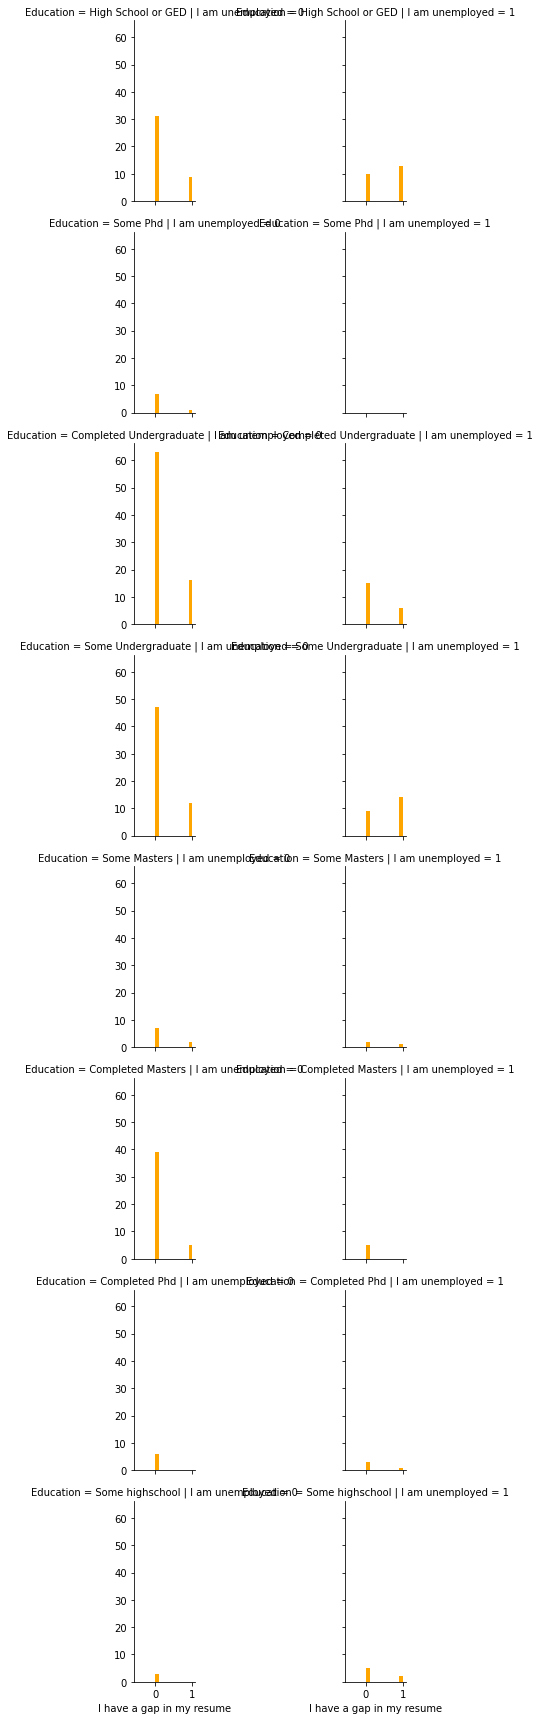

In [101]:
graph = sns.FacetGrid(df, row ='Education', col ='I am unemployed') 
# map the above form facetgrid with some attributes 
graph.map(plt.hist, 'I have a gap in my resume', color ='orange') 
# show the object 
plt.show() 

C:\Users\Ted\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


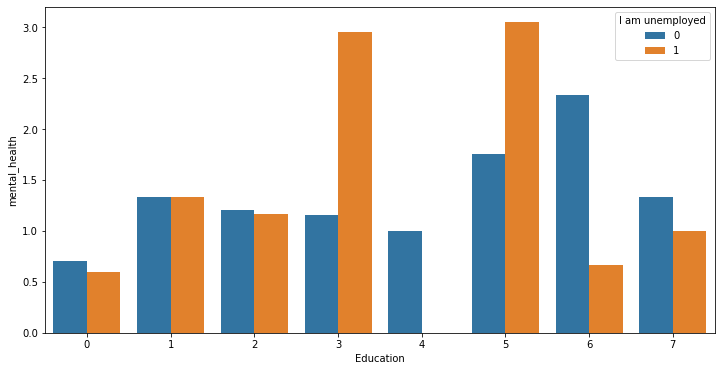

In [102]:
plt.figure(figsize=(12,6))
graph = sns.barplot(x = 'Education',
            y = 'mental_health',
            hue = 'I am unemployed',
            data = df_new,
            ci = 0.05)
 
# Show the plot
plt.show()

# The graph belowshows the Education impact on Mental_health while a gap being present in the resume

<Figure size 1296x648 with 0 Axes>

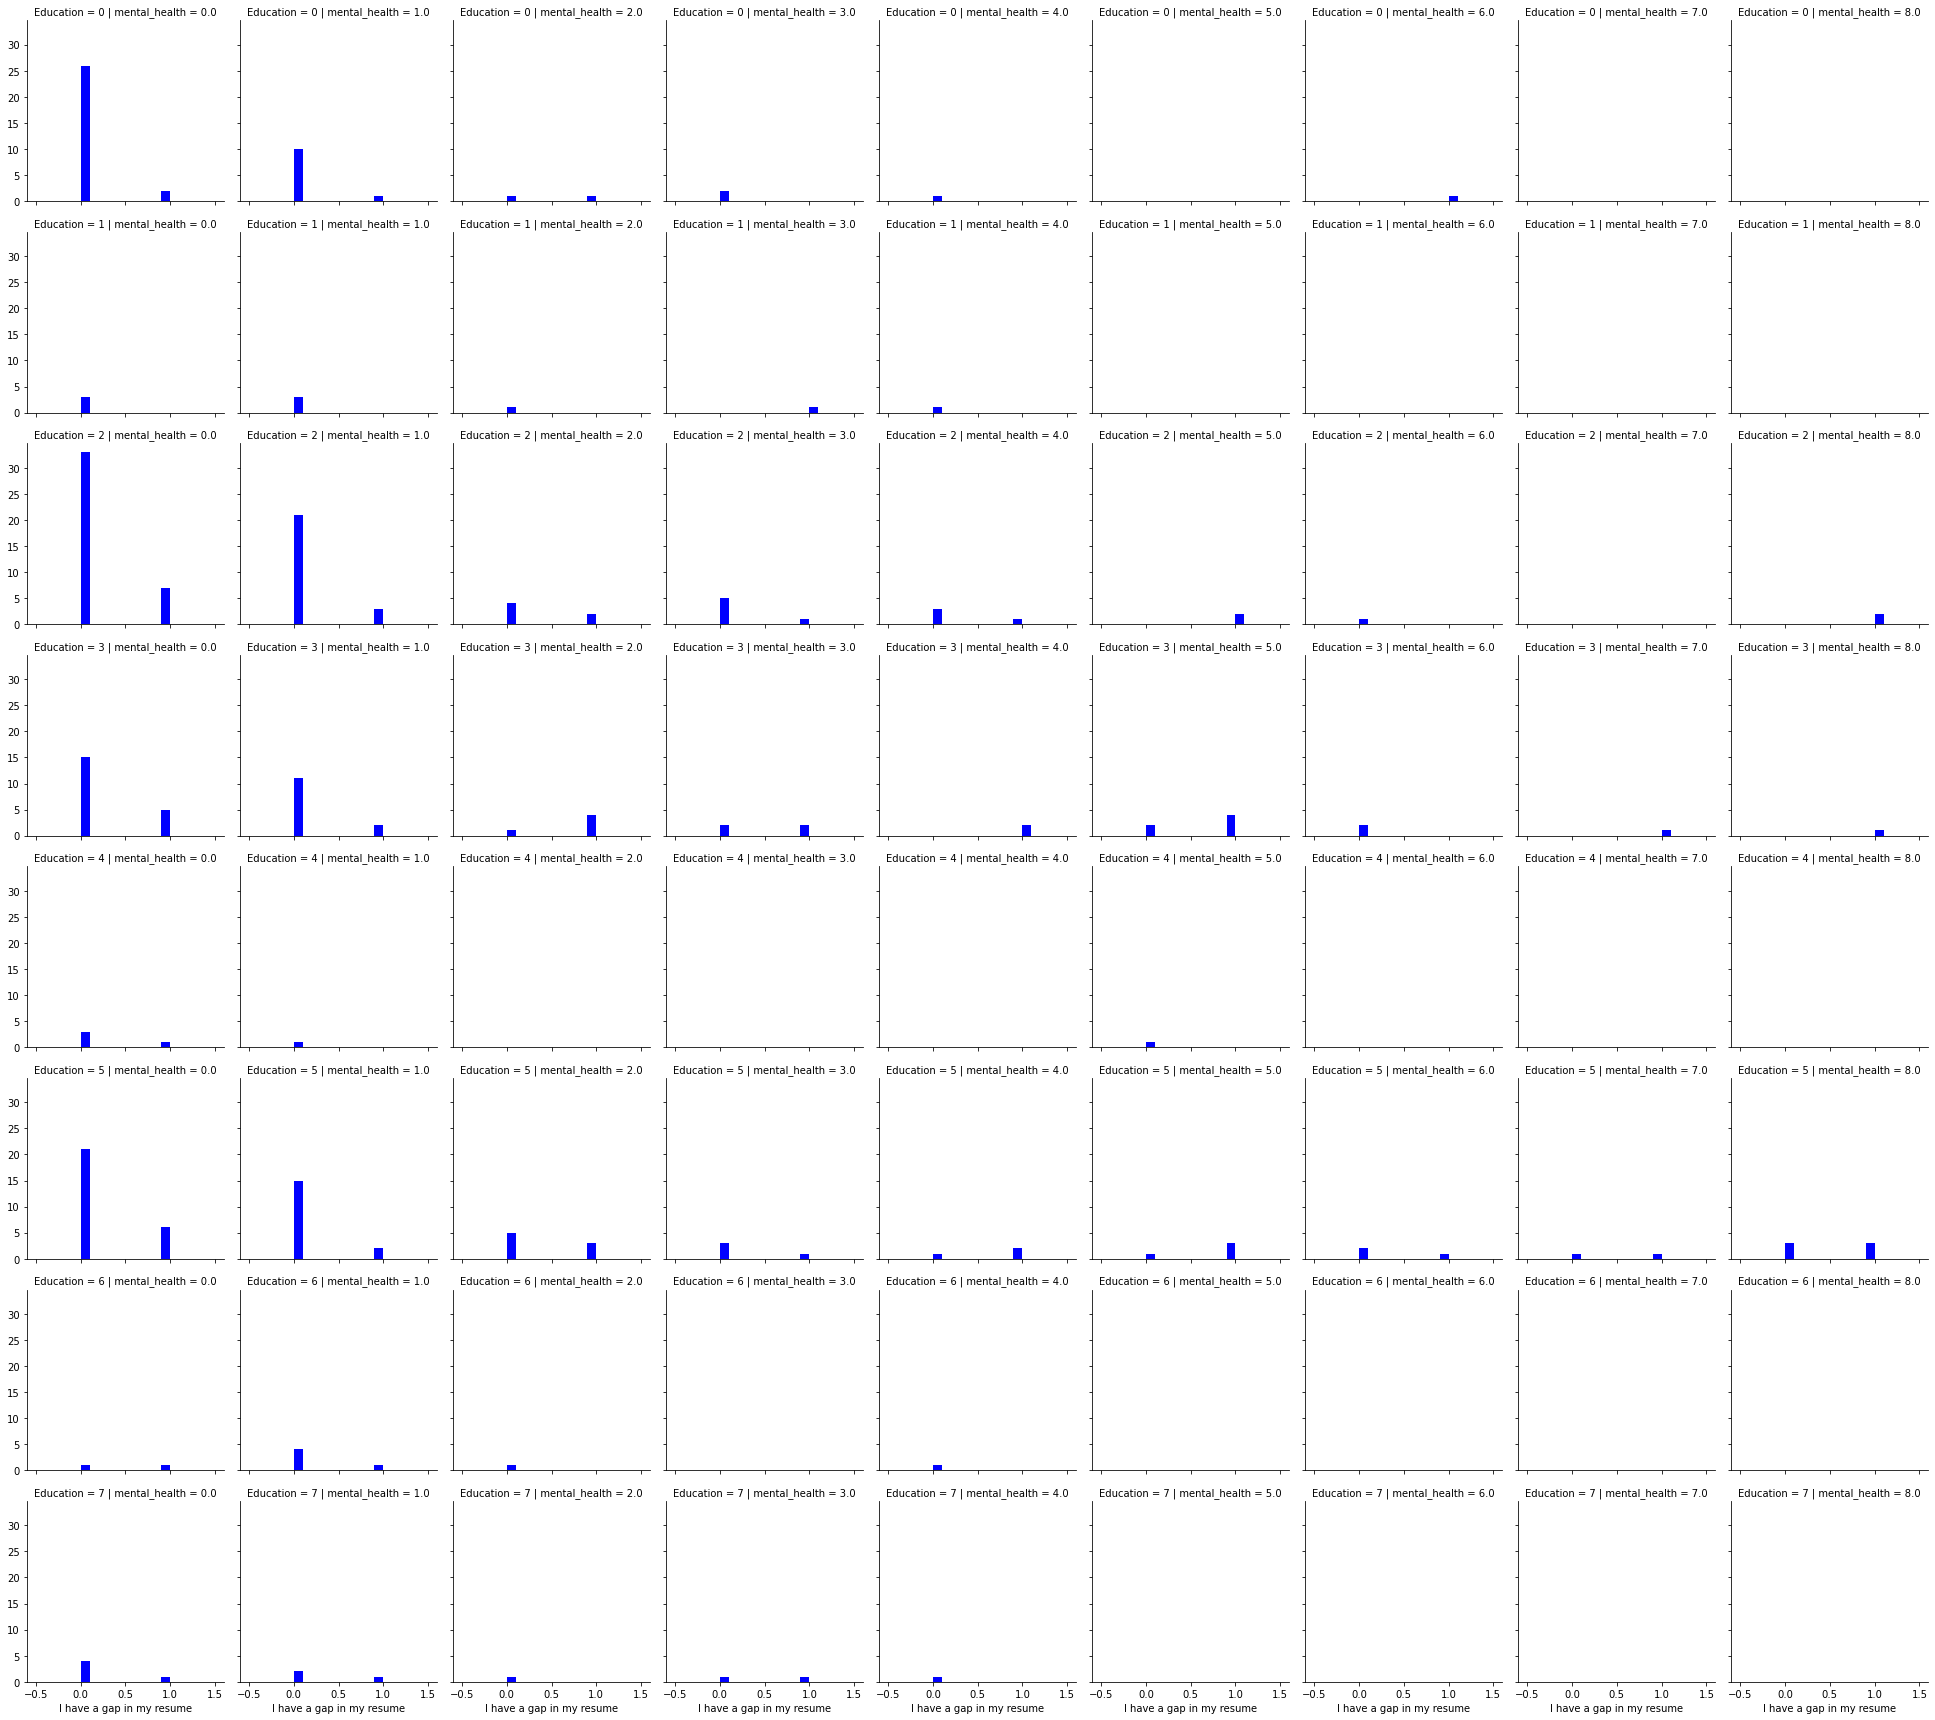

In [114]:
#graph = sns.FacetGrid(df, row ='Education', col ='I am unemployed') 
# map the above form facetgrid with some attributes 

plt.figure(figsize=(18,9))
graph = sns.FacetGrid(df_new,
            row = 'Education',
            col = 'mental_health')


graph.map(plt.hist, 'I have a gap in my resume', color ='Blue') 

plt.show()

# Effect of Unemployment on Mental Health

<Figure size 1296x648 with 0 Axes>

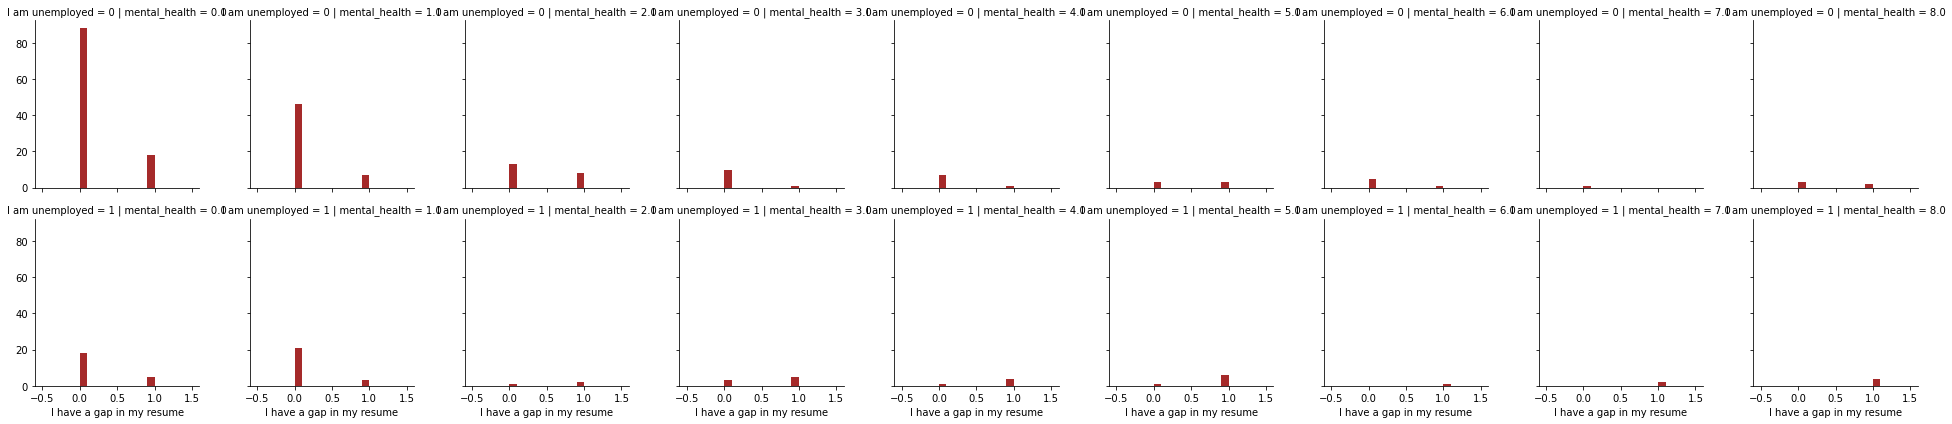

In [116]:
plt.figure(figsize=(18,9))
graph = sns.FacetGrid(df_new,
            row = 'I am unemployed',
            col = 'mental_health')


graph.map(plt.hist, 'I have a gap in my resume', color ='brown') 

plt.show()